# Coronavirus(COVID-19) Data Cleaning(Worldwide)
- Confirmed Cases 
- Deaths Cases 
- Recovered Cases 
![Coronavirus](./img/corona.png)

## Library Import

In [1]:
import pandas as pd 
from datetime import datetime, timedelta
import matplotlib as plt 
import seaborn as sns 

## Exploring Raw Data 

In [2]:
# Loading cumulative raw data 
raw_confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")
raw_recovered   = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv") 
raw_deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv")

In [3]:
# Shape of cumulative data
print(f"The Shape of Confirmed is: {raw_confirmed.shape}") 
print(f"The Shape of Recovered is: {raw_recovered.shape}")
print(f"The Shape of Deaths is: {raw_deaths.shape}")

The Shape of Confirmed is: (477, 63)
The Shape of Recovered is: (477, 63)
The Shape of Deaths is: (477, 63)


In [4]:
# Examine first few rows of raw_confirmed 
raw_confirmed.head() 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,59,70,75,82,114,147,177,212,272,322
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,639,639,701,773,839,825,878,889,924,963
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,178,178,200,212,226,243,266,313,345,385
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,149,149,197,238,428,566,673,790,900,1030


In [5]:
# Examine first few rows of raw_recovered 
raw_recovered.head() 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,34,34,35,35,35,35,41,42,42,42
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,118,118,118,118,118,144,144,144,150,191
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,96,96,97,105,105,109,114,114,114,124
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,26,26,26,35,42,42,49,60,75,87


In [6]:
# Examine first few rows of raw_recovered 
raw_deaths.head() 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,15,16,19,22,22,27,29,29,29,33
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,2,3


In [7]:
# Un-Pivoting the data 
raw_confirmed2 = pd.melt(raw_confirmed, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name=['Date'])
raw_recovered2 = pd.melt(raw_recovered, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name=['Date'])
raw_deaths2 = pd.melt(raw_deaths, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name=['Date'])

In [8]:
# Now take a look at the shape of data 
print(f"The Shape of Confirmed is: {raw_confirmed2.shape}")
print(f"The Shape of Recovered is: {raw_recovered2.shape}") 
print(f"The Shape of Deaths is: {raw_deaths2.shape}") 

The Shape of Confirmed is: (28143, 6)
The Shape of Recovered is: (28143, 6)
The Shape of Deaths is: (28143, 6)


In [9]:
# Examine first few rows of new dataframe 
raw_confirmed2.head()
raw_recovered2.head() 
raw_deaths2.head() 

,Province/State,Country/Region,Lat,Long,Date,value
0,NaN,Thailand,15.0000,101.0000,1/22/20,0
1,NaN,Japan,36.0000,138.0000,1/22/20,0
2,NaN,Singapore,1.2833,103.8333,1/22/20,0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0


In [10]:
# Convert date 
raw_confirmed2['Date'] = pd.to_datetime(raw_confirmed2['Date']) 
raw_recovered2['Date'] = pd.to_datetime(raw_recovered2['Date']) 
raw_deaths2['Date'] = pd.to_datetime(raw_deaths2['Date'])  

In [11]:
# Ranaming the values 
raw_confirmed2.columns = raw_confirmed2.columns.str.replace('value', 'Confirmed')
raw_recovered2.columns = raw_recovered2.columns.str.replace('value', 'Recovered')
raw_deaths2.columns = raw_deaths2.columns.str.replace('value', 'Deaths')

In [12]:
# After renaming 
raw_confirmed2.head()
raw_recovered2.head() 
raw_deaths2.head() 

,Province/State,Country/Region,Lat,Long,Date,Deaths
0,NaN,Thailand,15.0000,101.0000,2020-01-22,0
1,NaN,Japan,36.0000,138.0000,2020-01-22,0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0


In [13]:
# Handling missing values of confirmed 
raw_confirmed2.isnull().sum() 

Province/State    9027
Country/Region       0
Lat                  0
Long                 0
Date                 0
Confirmed            0
dtype: int64

In [14]:
# Handling missing values of recovered 
raw_recovered2.isnull().sum() 

Province/State    9027
Country/Region       0
Lat                  0
Long                 0
Date                 0
Recovered            0
dtype: int64

In [15]:
# Handling missing values of deaths 
raw_deaths2.isnull().sum() 

Province/State    9027
Country/Region       0
Lat                  0
Long                 0
Date                 0
Deaths               0
dtype: int64

In [16]:
# Filling missing values 
raw_confirmed2['Province/State'].fillna(raw_confirmed2['Country/Region'], inplace=True) 
raw_recovered2['Province/State'].fillna(raw_recovered2['Country/Region'], inplace=True)
raw_deaths2['Province/State'].fillna(raw_deaths2['Country/Region'], inplace=True)

In [17]:
# Printing shapes before joining 
print(f"Shape of Confirmed is: {raw_confirmed2.shape}")
print(f"Shape of Recovered is: {raw_recovered2.shape}")
print(f"Shape of Deaths is: {raw_deaths2.shape}")

Shape of Confirmed is: (28143, 6)
Shape of Recovered is: (28143, 6)
Shape of Deaths is: (28143, 6)


In [18]:
# Confirmed with Deaths
full_join = raw_confirmed2.merge(raw_deaths2[['Province/State','Country/Region','Date','Deaths']], 
                                      how = 'outer', 
                                      left_on = ['Province/State','Country/Region','Date'], 
                                      right_on = ['Province/State', 'Country/Region','Date'])


# full join with Recovered
full_join = full_join.merge(raw_recovered2[['Province/State','Country/Region','Date','Recovered']], 
                                      how = 'outer', 
                                      left_on = ['Province/State','Country/Region','Date'], 
                                      right_on = ['Province/State', 'Country/Region','Date'])

full_join.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Thailand,Thailand,15.0000,101.0000,2020-01-22,2,0,0
1,Japan,Japan,36.0000,138.0000,2020-01-22,2,0,0
2,Singapore,Singapore,1.2833,103.8333,2020-01-22,0,0,0
3,Nepal,Nepal,28.1667,84.2500,2020-01-22,0,0,0
4,Malaysia,Malaysia,2.5000,112.5000,2020-01-22,0,0,0


In [47]:
print("Shape of First Join: ", full_join.shape)
print("Shape of Second Join: ", full_join.shape)

Shape of First Join:  (27144, 8)
Shape of Second Join:  (27144, 8)


In [19]:
# Check missing values 
full_join.isnull().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
dtype: int64

In [49]:
# Looks good! 
# It's time to export cleaned data 
full_join.to_csv("covid-19_cleaned_data.csv") 

In [3]:
# Take a look at our cleaned dataset 
cleaned_data = pd.read_csv("world_data/cleaned_data/covid-19_cleaned_data.csv", index_col=False)
cleaned_data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Thailand,Thailand,15.0000,101.0000,2020-01-22,2,0,0
1,Japan,Japan,36.0000,138.0000,2020-01-22,2,0,0
2,Singapore,Singapore,1.2833,103.8333,2020-01-22,0,0,0
3,Nepal,Nepal,28.1667,84.2500,2020-01-22,0,0,0
4,Malaysia,Malaysia,2.5000,112.5000,2020-01-22,0,0,0


In [4]:
bd = cleaned_data[cleaned_data['Country/Region']=='Bangladesh']

In [7]:
bd.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
90,Bangladesh,Bangladesh,23.685,90.3563,2020-01-22,0,0,0
558,Bangladesh,Bangladesh,23.685,90.3563,2020-01-23,0,0,0
1026,Bangladesh,Bangladesh,23.685,90.3563,2020-01-24,0,0,0
1494,Bangladesh,Bangladesh,23.685,90.3563,2020-01-25,0,0,0
1962,Bangladesh,Bangladesh,23.685,90.3563,2020-01-26,0,0,0


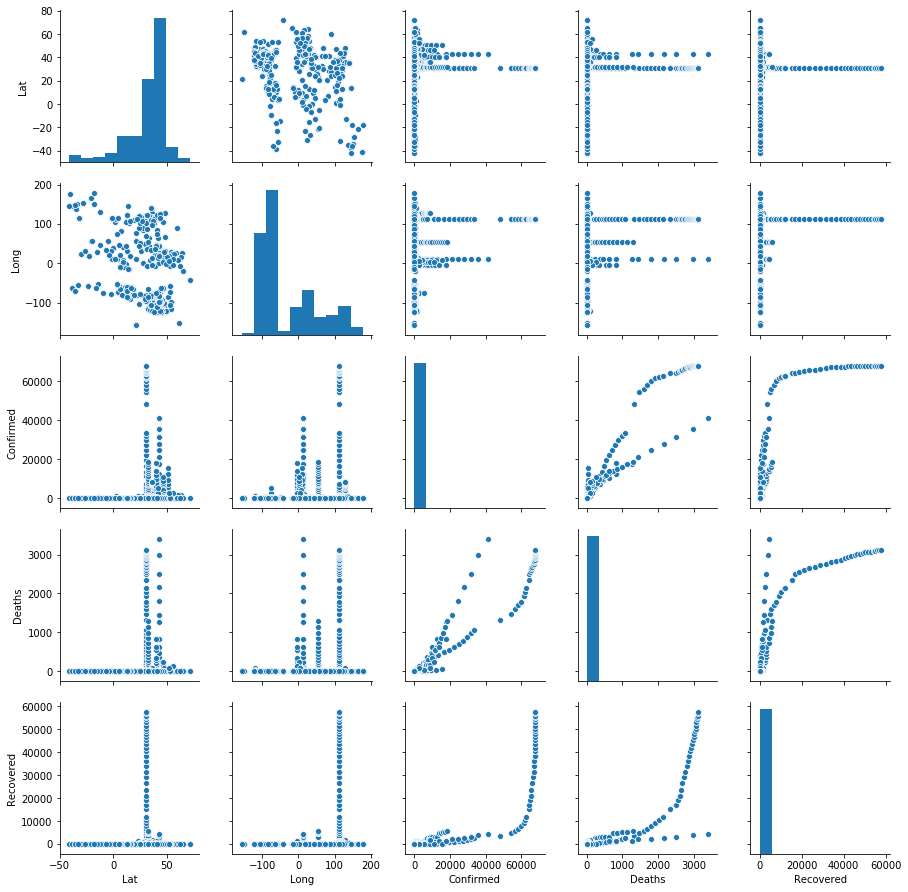

In [4]:
sns.pairplot(cleaned_data)

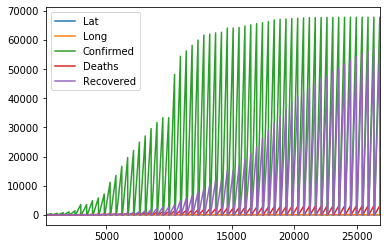

In [7]:
cleaned_data[cleaned_data['Country/Region']=='China'].plot(kind="line")